In [1]:
#Four functions 
#Function 1: Creates White Noisemap 
#Function 2: Reads in Hitsmap 
#Function 3: Creates Noisemap
#Function 4: Beam Convolution 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy 
import math 
import scipy 
import healpy as hp #read in hitsmaps with healpy
%matplotlib inline
import camb 
import warnings
warnings.filterwarnings("ignore")
import limpy as lp
import limpy.utils as lu
from limpy import *
#from limpy import lline

In [3]:
from pylab import imshow
from numpy import random
from PIL import Image
from numpy.linalg import inv
from __future__ import division
from matplotlib import gridspec
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style #color/plotting
plt.style.use(astropy_mpl_style)
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel #beam convolution 
from astropy.modeling.models import Gaussian2D

In [4]:
#Hitsmap as fits

In [5]:
#file='/Users/marxena/Desktop/toast_hits.fits' #put directory of file working with
file='/Users/marxena/Desktop/1.fits'

In [6]:
#generate the hitsmap based off the file
def Hitsmap(FILE):
    x=fits.open(FILE)
    x.info()
    hdu=x[0]
    hdu.header
    image_data = fits.getdata(FILE, ext=0)
    print(image_data.shape)
    array=hdu.data
    HIT = np.sum(array, axis=0)
    return HIT

In [7]:
Hitsmap=Hitsmap(file)
shape=np.shape(Hitsmap)

Filename: /Users/marxena/Desktop/1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   (36, 27, 3)   int16 (rescales to uint16)   
(3, 27, 36)


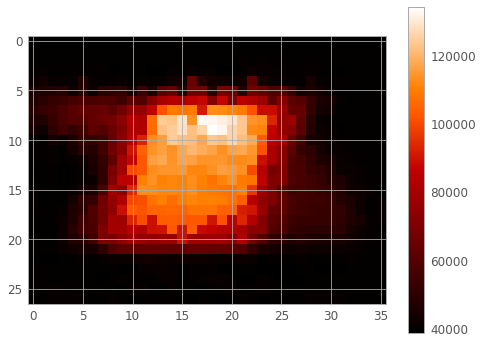

In [8]:
imshow(Hitsmap)
plt.colorbar()

In [9]:
#White Noise

In [10]:
#generates random matrix 
#added another random matrix for atmosphere 
def WhiteNoiseMap(x_dim,y_dim):
    ANoise=1 #subject to change 
    WNoise=np.random.randn(x_dim,y_dim)*ANoise
    atmosphere=np.random.randn(x_dim,y_dim)*WNoise 
    return atmosphere
    #return WNoise

In [11]:
#Atmosphere function will be ready in 1-2 weeks 
#amplitude of atmosphere needed 
#Steve has values of atmosphere 

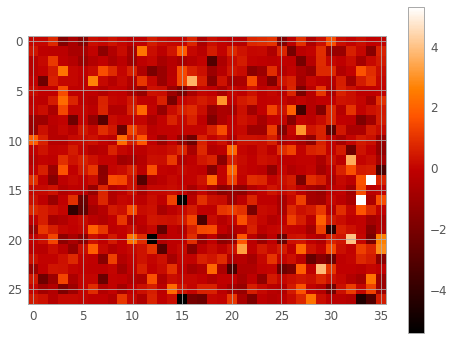

In [12]:
WhiteNoise=WhiteNoiseMap(shape[0],shape[1])
#WhiteNoise=WhiteNoiseMap(269,80)
imshow(WhiteNoise)
plt.colorbar()

In [13]:
#Noisemap
#inputs the WhiteNoise and Hitsmap to generate the Noisemap. 
def Noisemap(hitsmap, whitenoise):
    shape = np.shape(hitsmap)
    xs= shape[0]
    ys =shape[1]
    W=WhiteNoiseMap(xs, ys) 
    N= whitenoise/hitsmap
    return N

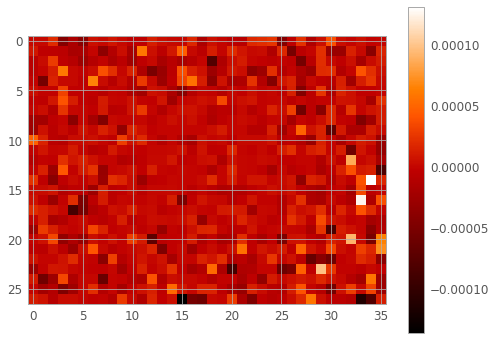

In [14]:
NM=Noisemap(Hitsmap,WhiteNoise)
imshow(NM)
plt.colorbar()

In [15]:
#show_arrays()

In [16]:
def plot_figure(WhiteNoise, Hitsmap, NM, figname="Maps.png"):
    fig, axx = plt.subplots(figsize=(9,9), dpi=100, nrows=1, ncols=3) #the ordering
    axx[0].imshow(WhiteNoise)#,cmap='afmhot')
    axx[1].imshow(Hitsmap)#,cmap='afmhot')
    axx[2].imshow(NM)#,cmap='afmhot')

    plt.tight_layout()

    plt.colorbar(imshow(WhiteNoise),ax=axx[0],fraction=0.04)
    plt.colorbar(imshow(Hitsmap),ax=axx[1],fraction=0.04)
    plt.colorbar(imshow(NM),ax=axx[2],fraction=0.04)

    if figname: 
                 plt.savefig(figname,bbox_inches='tight')
    else:
                 plt.savefig("Maps.png",bbox_inches='tight')
            
    plt.show()

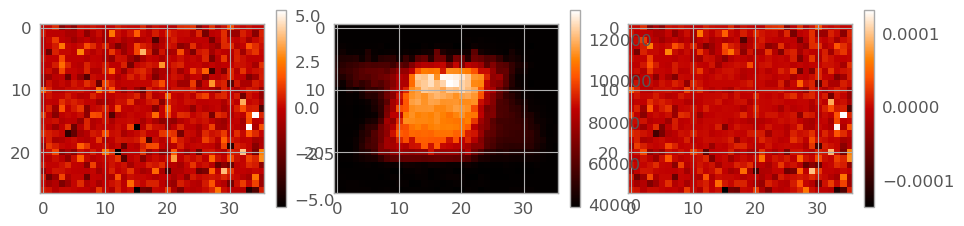

In [17]:
plot_figure(WhiteNoise, Hitsmap, NM, figname="Maps.png")

In [18]:
#Atmospheric noise-- add to whitenoisemap  -maybe kinda done?
#beam convolution -- from limpy lline.py 
#read helpix (the real hitsmap)  --need a real hitsmap 
#normalization of the white noise (NDist/hit), wait for the calculation
#use power spectra to check if everything works -Where to find power spectra/how to get??

In [19]:
def BeamCon(): 
    gauss = Gaussian2D(4, 1, 2, 3, 5) #gauss kernel, can change as needed (wrong for this code, cant be random)
    
    gauss_kernel = Gaussian2DKernel(2)  #std dev=2pix 
    #tophat_kernel = Tophat2DKernel(5)   #width=5pix
    
    smoothed_data_gauss = convolve(NM, gauss_kernel)
    #smoothed_data_gauss = convolve(NM, tophat_kernel)
    
    Beam=imshow(smoothed_data_gauss)
    plt.colorbar()
    
    return Beam

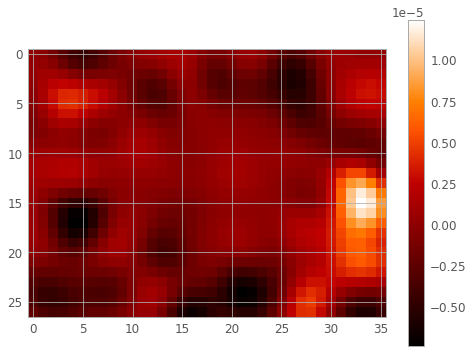

In [20]:
BeamCon()

In [21]:
#beamcon in lline.py

In [22]:
#just import the function and call it 
#real or degree space- figure out the units -- 

In [23]:
lp.beam_convolution(10, theta_fwhm, beam_unit, boxsize, ngrid, halo_redshift, line_name='CII158', quantity='intensity')

AttributeError: module 'limpy' has no attribute 'beam_convolution'

In [24]:
beam_convolution(30, 30, 'degrees', 30, 5, 6, line_name='CII158', quantity='intensity')

NameError: name 'beam_convolution' is not defined

In [25]:
theta_fwhm=30
beam_unit='degree'
theta=lu.convert_beam_unit_to_radian(theta_fwhm, beam_unit=beam_unit)
print(theta)

0.5235987755982988


In [26]:
#halo_redshift=5
#beam_size=lu.angle_to_comoving_size(halo_redshift, theta)
#print(beam_size)

In [27]:
beam_std=beam_size/(np.sqrt(8*np.log(2.0))) 
print(beam_std)

NameError: name 'beam_size' is not defined

In [28]:
gauss_kernel = Gaussian2DKernel(beam_std) #one min to run 
print(gauss_kernel)

NameError: name 'beam_std' is not defined

In [29]:
grid_quantity=10
convolved_grid = convolve(NM,gauss_kernel) #why does this take long to run??? #started: 10:30, ended 10:41

NameError: name 'gauss_kernel' is not defined

In [30]:
imshow(convolved_grid)
#plt.colorbar()
#plt.savefig('beamcon2')

NameError: name 'convolved_grid' is not defined

NameError: name 'convolved_grid' is not defined

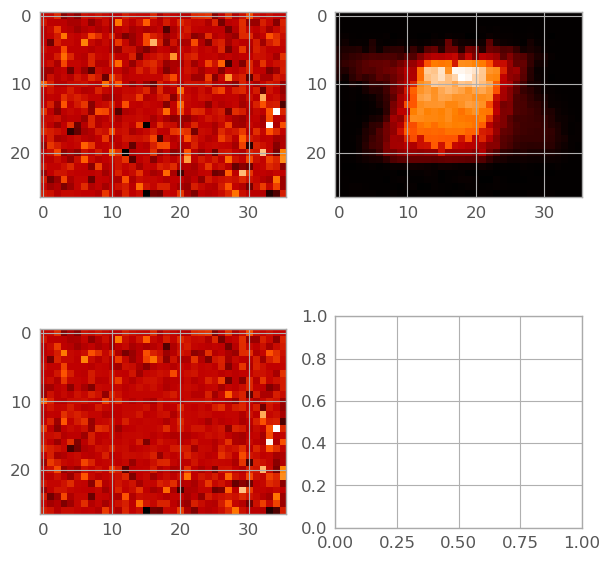

In [31]:
fig, axx = plt.subplots(figsize=(7,7), dpi=100, nrows=2, ncols=2) #the ordering
axx[0,0].imshow(WhiteNoise)
axx[0,1].imshow(Hitsmap)
axx[1,0].imshow(NM)
axx[1,1].imshow(convolved_grid)

plt.tight_layout()

plt.colorbar(imshow(WhiteNoise),ax=axx[0,0],fraction=0.04)
plt.colorbar(imshow(Hitsmap),ax=axx[0,1],fraction=0.04)
plt.colorbar(imshow(NM),ax=axx[1,0],fraction=0.04)
plt.colorbar(imshow(convolved_grid),ax=axx[1,1],fraction=0.04)